# Gaussian Distribution Analysis#

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - .5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

In [3]:
S0 = 100.
r = .05
sigma = .2
T = 1.
M = 50
I = 250000
paths = gen_paths(S0, r, sigma, T, M, I)

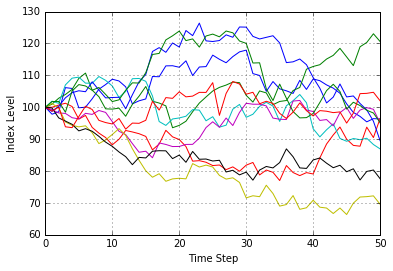

In [4]:
plt.plot(paths[:, : 10])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Index Level')

In [5]:
log_returns = np.log(paths[1:] / paths[0: -1])

In [6]:
paths[:, 0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [7]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [8]:
def print_statistics(array):
    sta = scs.describe(array)
    print '%14s %15s' % ('statistic', 'value')
    print 30 * '-'
    print '%14s %15.5f' % ('size', sta[0])
    print '%14s %15.5f' % ('min', sta[1][0])
    print '%14s %15.5f' % ('max', sta[1][1])
    print '%14s %15.5f' % ('mean', sta[2])
    print '%14s %15.5f' % ('std', np.sqrt(sta[3]))
    print '%14s %15.5f' % ('skew', sta[4])
    print '%14s %15.5f' % ('kurtosis', sta[5])

In [9]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


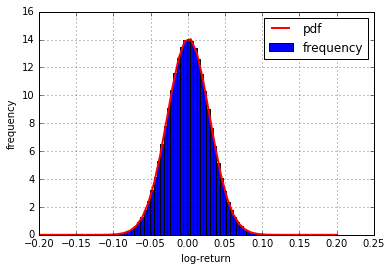

In [10]:
plt.hist(log_returns.flatten(), bins = 70, normed = True, label = 'frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc = r / M, scale = sigma / np.sqrt(M)), 'r', lw = 2., label = 'pdf')
plt.legend()

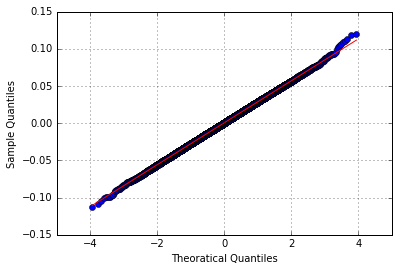

In [11]:
sm.qqplot(log_returns.flatten()[::500], line = 's')
plt.grid(True)
plt.xlabel('Theoratical Quantiles')
plt.ylabel('Sample Quantiles')

In [12]:
def normality_tests(arr):
    print 'Skew of data set %14.3f' % scs.skew(arr)
    print 'Skew test p-value %14.3f' % scs.skewtest(arr)[1]
    print 'Kurt of data set %14.3f' % scs.kurtosis(arr)
    print 'Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1]
    print 'Norm test p-value %14.3f' % scs.normaltest(arr)[1]

In [13]:
normality_tests(log_returns.flatten())

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


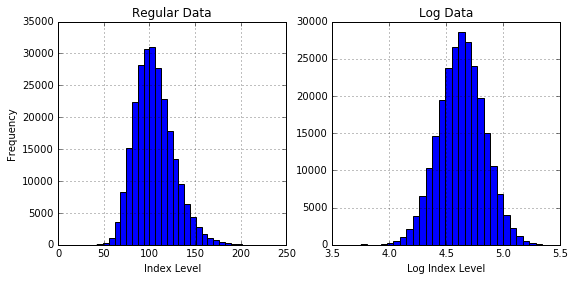

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 4))
ax1.hist(paths[-1], bins = 30)
ax1.grid(True)
ax1.set_xlabel('Index Level')
ax1.set_ylabel('Frequency')
ax1.set_title('Regular Data')

ax2.hist(np.log(paths[-1]), bins = 30)
ax2.grid(True)
ax2.set_xlabel('Log Index Level')
ax2.set_title('Log Data')

In [15]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [16]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [17]:
normality_tests(np.log(paths[-1]))

Skew of data set         -0.001
Skew test p-value          0.851
Kurt of data set         -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


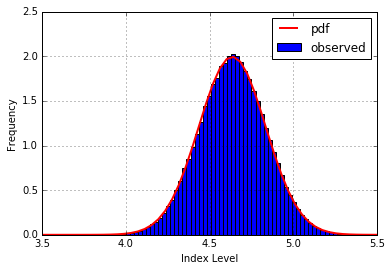

In [18]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins = 70, normed = True, label = 'observed')
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw = 2., label = 'pdf')
plt.legend()

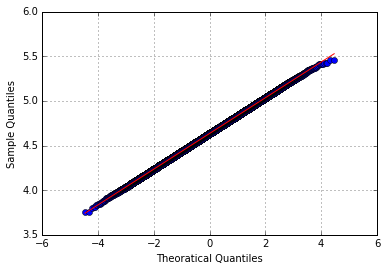

In [19]:
sm.qqplot(log_data, line = 's')
plt.grid(True)
plt.xlabel('Theoratical Quantiles')
plt.ylabel('Sample Quantiles')

## Real Data##

In [20]:
import pandas as pd
import pandas_datareader.data as web

In [21]:
symbols = ['^GDAXI', '^GSPC', 'COST', 'SBUX']

In [22]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source = 'yahoo', start = '1/1/2006')['Adj Close']
data = data.dropna()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2006-01-03 to 2016-06-24
Data columns (total 4 columns):
^GDAXI    2608 non-null float64
^GSPC     2608 non-null float64
COST      2608 non-null float64
SBUX      2608 non-null float64
dtypes: float64(4)
memory usage: 101.9 KB


In [24]:
data.head()

,^GDAXI,^GSPC,COST,SBUX
Date,,,,
2006-01-03,5460.680176,1268.800049,40.084936,14.093670
2006-01-04,5523.620117,1273.459961,40.213416,14.458909
2006-01-05,5516.529785,1273.479980,39.972519,14.431517
2006-01-06,5536.319824,1285.449951,40.028727,14.436082
2006-01-09,5537.109863,1290.150024,40.189325,14.289986


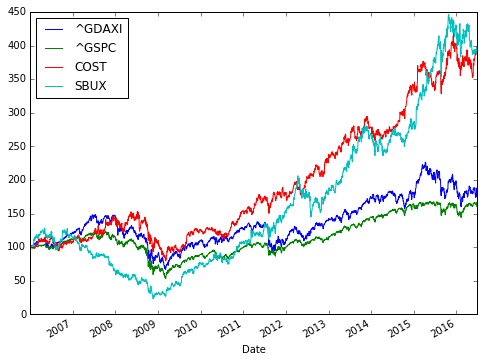

In [25]:
(data / data.ix[0] * 100).plot(figsize = (8, 6))

In [26]:
log_returns = np.log(data / data.shift(1))

In [27]:
log_returns.head()

,^GDAXI,^GSPC,COST,SBUX
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.011460,0.003666,0.003200,0.025585
2006-01-05,-0.001284,0.000016,-0.006008,-0.001896
2006-01-06,0.003581,0.009356,0.001405,0.000316
2006-01-09,0.000143,0.003650,0.004004,-0.010172


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d66c4e050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9d654d6490>]], dtype=object)

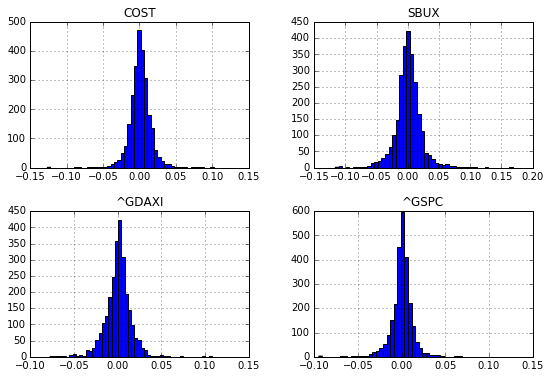

In [28]:
log_returns.hist(bins = 50, figsize = (9, 6))

In [29]:
for sym in symbols:
    print '\nResults for symbol %s' % sym
    print 30 * '-'
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
     statistic           value
------------------------------
          size      2607.00000
           min        -0.07739
           max         0.10797
          mean         0.00021
           std         0.01471
          skew        -0.04218
      kurtosis         5.49919

Results for symbol ^GSPC
------------------------------
     statistic           value
------------------------------
          size      2607.00000
           min        -0.09470
           max         0.10957
          mean         0.00018
           std         0.01305
          skew        -0.31999
      kurtosis        10.10797

Results for symbol COST
------------------------------
     statistic           value
------------------------------
          size      2607.00000
           min        -0.12673
           max         0.10212
          mean         0.00052
           std         0.01443
          skew        -0.00454
      kurtosis         

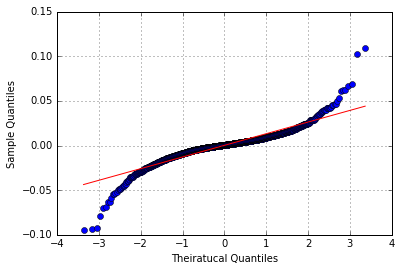

In [30]:
sm.qqplot(log_returns['^GSPC'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('Theiratucal Quantiles')
plt.ylabel('Sample Quantiles')

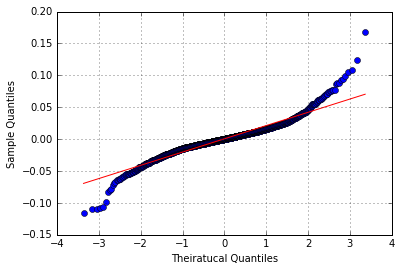

In [31]:
sm.qqplot(log_returns['SBUX'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('Theiratucal Quantiles')
plt.ylabel('Sample Quantiles')

In [32]:
for sym in symbols:
    print '\nResults for symbol %s' % sym
    print 30 * '-'
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol ^GDAXI
------------------------------
Skew of data set         -0.042
Skew test p-value          0.378
Kurt of data set          5.499
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol ^GSPC
------------------------------
Skew of data set         -0.320
Skew test p-value          0.000
Kurt of data set         10.108
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol COST
------------------------------
Skew of data set         -0.005
Skew test p-value          0.924
Kurt of data set          7.602
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol SBUX
------------------------------
Skew of data set          0.293
Skew test p-value          0.000
Kurt of data set          5.876
Kurt test p-value          0.000
Norm test p-value          0.000


## Portfolio Optimization##

## Input Data##

In [33]:
symbols = ['SBUX', 'COST', 'AAPL', 'GNTX', 'DDAIF']
noa = len(symbols)

In [34]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source = 'yahoo')['Adj Close']
data.columns = symbols

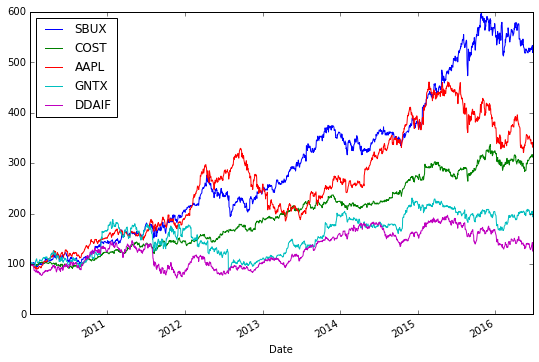

In [35]:
(data / data.ix[0] * 100).plot(figsize = (9, 6))

In [36]:
rets = np.log(data / data.shift(1)).dropna()

In [37]:
rets.mean() * 252

SBUX     0.254766
COST     0.176020
AAPL     0.185465
GNTX     0.102318
DDAIF    0.035482
dtype: float64

In [38]:
rets.cov() * 252

,SBUX,COST,AAPL,GNTX,DDAIF
SBUX,0.065189,0.019612,0.026528,0.034956,0.038410
COST,0.019612,0.030409,0.014203,0.019775,0.024495
AAPL,0.026528,0.014203,0.071411,0.030558,0.034659
GNTX,0.034956,0.019775,0.030558,0.116999,0.058317
DDAIF,0.038410,0.024495,0.034659,0.058317,0.113801


In [39]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [40]:
weights

array([ 0.0346395 ,  0.02726489,  0.2868883 ,  0.10396806,  0.54723926])

In [41]:
np.sum(rets.mean() * weights) * 252

0.09688678157261431

In [42]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.064002062920800462

In [43]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.25298628998584183

In [44]:
prets = list()
pvols = list()

for p in range(25000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

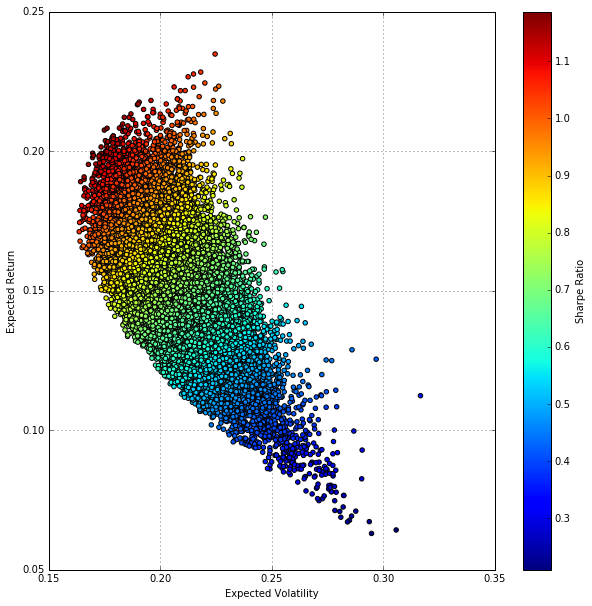

In [45]:
plt.figure(figsize = (10, 10))
plt.scatter(pvols, prets, c = prets / pvols, marker = 'o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')

## Optimization##

In [46]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [47]:
import scipy.optimize as sco

In [48]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [49]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [50]:
bnds = tuple((0, 1) for x in range(noa))

In [51]:
noa * [1. / noa]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [52]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa], method = 'SLSQP', bounds = bnds, constraints = cons)

CPU times: user 32 ms, sys: 4 ms, total: 36 ms
Wall time: 36.7 ms


In [53]:
opts

     fun: -1.20530891579096
     jac: array([  1.63048506e-04,  -1.12175941e-04,   4.24385071e-05,
         5.04967645e-01,   1.07930999e+00,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([  3.32227824e-01,   5.33590788e-01,   1.34181388e-01,
         1.55474592e-16,   7.96346496e-16])

In [54]:
opts['x'].round(3)

array([ 0.332,  0.534,  0.134,  0.   ,  0.   ])

In [55]:
statistics(opts['x']).round(3)

array([ 0.203,  0.169,  1.205])

In [56]:
def min_func_variance(weights):
    return (statistics(weights)[1]) ** 2

In [57]:
optv = sco.minimize(min_func_variance, noa * [1. / noa], method = 'SLSQP', bounds = bnds, constraints = cons)

In [58]:
optv

     fun: 0.026095019105018505
     jac: array([ 0.0525139 ,  0.05211183,  0.05223973,  0.05255768,  0.05765477,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([ 0.1062886 ,  0.68697206,  0.17738992,  0.02934943,  0.        ])

In [59]:
optv['x'].round(3)

array([ 0.106,  0.687,  0.177,  0.029,  0.   ])

In [60]:
statistics(optv['x']).round(3)

array([ 0.184,  0.162,  1.138])

## Efficient Frontier##

In [61]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, 
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [62]:
def min_func_port(weights):
    return statistics(weights)[1]

In [63]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = list()
for tret in trets:
    res = sco.minimize(min_func_port, noa * [1. / noa,], method = 'SLSQP', bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 4.44 s, sys: 4 ms, total: 4.44 s
Wall time: 4.47 s


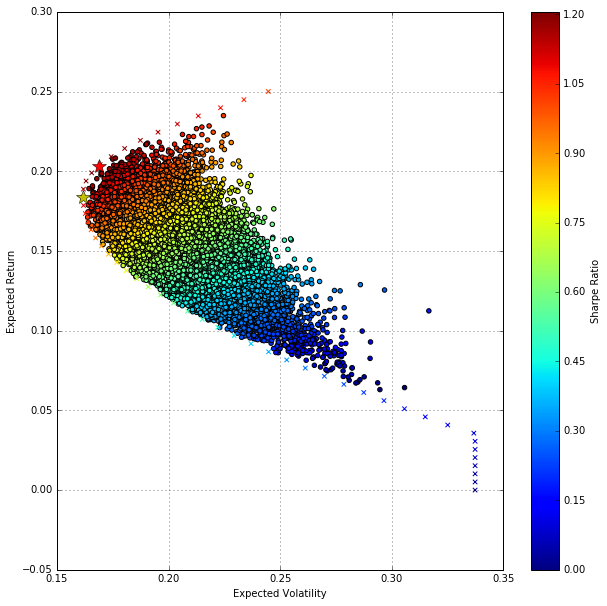

In [64]:
plt.figure(figsize = (10, 10))
plt.scatter(pvols, prets, c = prets / pvols, marker = 'o')
plt.scatter(tvols, trets, c = trets / tvols, marker = 'x')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')

## money market line##

In [65]:
import scipy.interpolate as sci

In [66]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [67]:
tck = sci.splrep(evols, erets)

In [68]:
def f(x):
    return sci.splev(x, tck, der = 0)
def df(x):
    return sci.splev(x, tck, der = 1)

In [69]:
def equations(p, rf = 0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [70]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [71]:
opt

array([ 0.01      ,  1.12854514,  0.16271932])

In [72]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

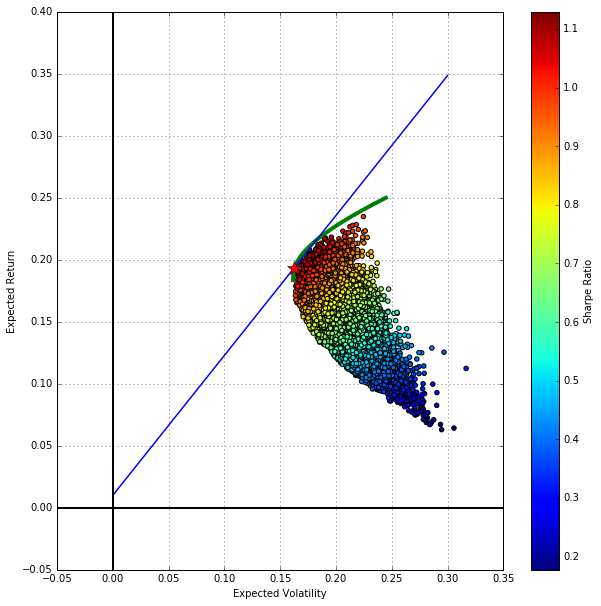

In [73]:
plt.figure(figsize = (10, 10))
plt.scatter(pvols, prets, c = (prets - .01) / pvols, marker = 'o')
plt.plot(evols, erets, 'g', lw = 4.)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw = 1.5)
plt.plot(opt[2], f(opt[2]), 'r*', markersize = 15.)
plt.grid(True)
plt.axhline(0, color = 'k', ls = '-', lw = 2.)
plt.axvline(0, color = 'k', ls = '-', lw = 2.)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')

In [74]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - f(opt[2])}, 
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [75]:
res = sco.minimize(min_func_port, noa * [1. / noa,], method = 'SLSQP', bounds = bnds, constraints = cons)

In [76]:
res['x'].round(3)

array([ 0.204,  0.632,  0.164,  0.   ,  0.   ])

## PCA: Primary Component Analysis##

In [77]:
from sklearn.decomposition import KernelPCA as PCA

In [78]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CBK.DE', 'CON.DE',
          'DAI.DE', 'DB1.DE', 'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE',
          'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE', 'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE',
          'RWE.DE', 'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE', '^GDAXI']

In [79]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source = 'yahoo')['Close']
data = data.dropna()

CPU times: user 336 ms, sys: 24 ms, total: 360 ms
Wall time: 10.2 s


In [80]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [81]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2010-01-04,38.505,88.54,44.850,56.40,46.445,32.050
2010-01-05,39.720,88.81,44.170,55.37,46.200,32.310
2010-01-06,39.400,89.50,44.450,55.02,46.165,32.810
2010-01-07,39.745,88.47,44.155,54.30,45.700,33.100
2010-01-08,39.600,87.99,44.020,53.82,44.380,32.655


In [82]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [83]:
pca = PCA().fit(data.apply(scale_function))

In [84]:
len(pca.lambdas_)

850

In [85]:
pca.lambdas_[:10].round()

array([ 31526.,   5775.,   4888.,   2352.,   1652.,    936.,    502.,
          349.,    288.,    223.])

In [86]:
get_we = lambda x: x / x.sum()

In [87]:
get_we(pca.lambdas_)[:10]

array([ 0.63805835,  0.11688184,  0.09893242,  0.04760996,  0.0334326 ,
        0.01894775,  0.01016034,  0.00705499,  0.00582902,  0.00450677])

In [88]:
get_we(pca.lambdas_)[:10].sum()

0.98141402600046201

In [89]:
pca = PCA(n_components = 1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

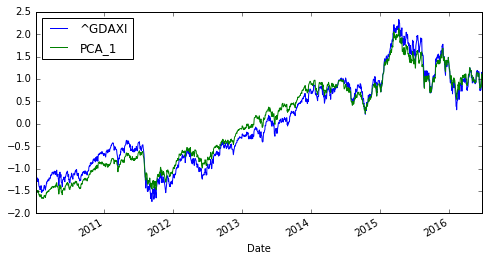

In [90]:
dax.apply(scale_function).plot(figsize = (8, 4))

In [91]:
pca = PCA(n_components = 5).fit(data.apply(scale_function))
pca_components = pca.transform(data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

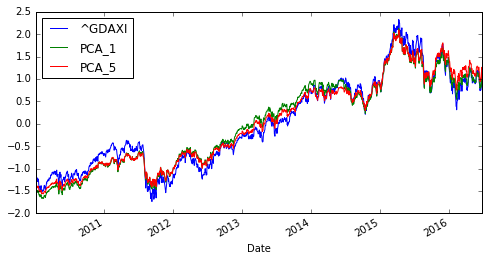

In [92]:
dax.apply(scale_function).plot(figsize = (8, 4))

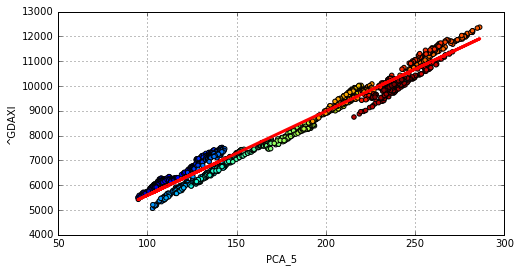

In [93]:
plt.figure(figsize = (8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c = dax.index)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'], dax['^GDAXI'], 1), dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw = 3.)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')

In [94]:
cut_date = '2011/7/1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, dax['^GDAXI'][dax.index < cut_date], 1), early_pca)

In [95]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, dax['^GDAXI'][dax.index >= cut_date], 1), late_pca)

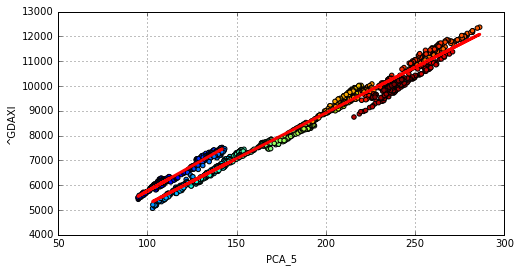

In [96]:
plt.figure(figsize = (8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c =dax.index)
plt.plot(early_pca, early_reg, 'r', lw = 3.)
plt.plot(late_pca, late_reg, 'r', lw = 3.)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')

## Bayess Regression##

In [97]:
import warnings
warnings.simplefilter('ignore')
import pymc3 as pm
np.random.seed(1000)

In [98]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) ** 2

In [99]:
reg = np.polyfit(x, y, 1)

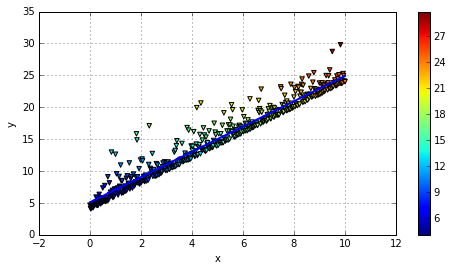

In [100]:
plt.figure(figsize = (8, 4))
plt.scatter(x, y, c = y, marker = 'v')
plt.plot(x, reg[1] + reg[0] * x, lw = 2.)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [101]:
reg

array([ 1.9814106 ,  5.09704674])

In [102]:
model = pm.Model()
with model:
    alpha = pm.Normal('alpha', mu = 0, sd = 20)
    beta = pm.Normal('beta', mu = 0, sd = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    
    y_est = alpha + beta * x
    
    likelihood = pm.Normal('y', mu = y_est, sd = sigma, observed = y)
    
    start = pm.find_MAP()
    step = pm.NUTS(state = start)
    trace = pm.sample(100, step, start = start, progressbar = False)

Applied interval-transform to sigma and added transformed sigma_interval to model.


In [103]:
trace[0]

{'alpha': 5.1386528721334122,
 'beta': 1.9775300234047308,
 'sigma': 1.3393883099219619,
 'sigma_interval': -1.8665723294291869}

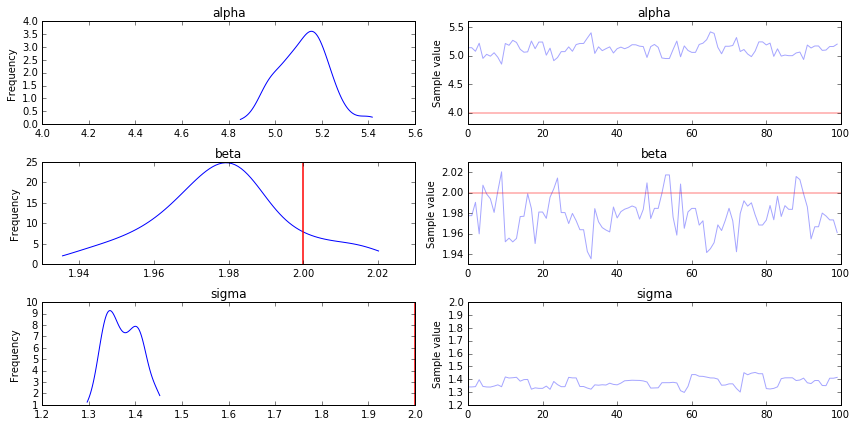

In [104]:
fig = pm.traceplot(trace, lines = {'alpha': 4, 'beta': 2, 'sigma': 2})
plt.figure(figsize = (8, 8))

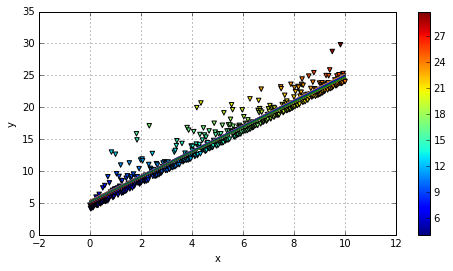

In [105]:
plt.figure(figsize = (8, 4))
plt.scatter(x, y, c = y, marker = 'v')
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)

## Real Data##

In [106]:
import zipline
import pytz
import datetime as dt

In [107]:
data = zipline.data.load_from_yahoo(stocks = ['GLD', 'GDX'], 
                                    end = dt.datetime(2014, 3, 15, 0, 0, 0, 0, pytz.utc)).dropna()

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1967 entries, 2006-05-22 to 2014-03-14
Data columns (total 2 columns):
GDX    1967 non-null float64
GLD    1967 non-null float64
dtypes: float64(2)
memory usage: 46.1 KB


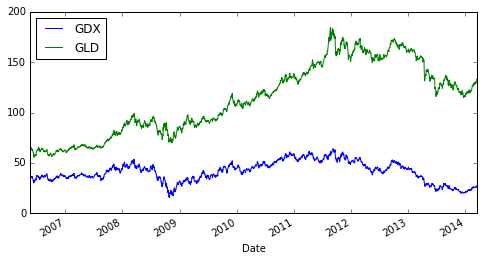

In [109]:
data.plot(figsize = (8, 4))

In [110]:
data.ix[-1] / data.ix[0] - 1

GDX   -0.216000
GLD    1.038285
dtype: float64

In [111]:
data.corr()

,GDX,GLD
GDX,1.00000,0.46696
GLD,0.46696,1.00000


In [112]:
data.index

DatetimeIndex(['2006-05-22', '2006-05-23', '2006-05-24', '2006-05-25',
               '2006-05-26', '2006-05-30', '2006-05-31', '2006-06-01',
               '2006-06-02', '2006-06-05',
               ...
               '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-10', '2014-03-11', '2014-03-12',
               '2014-03-13', '2014-03-14'],
              dtype='datetime64[ns, UTC]', name=u'Date', length=1967, freq=None)

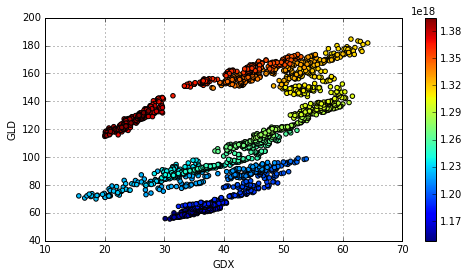

In [113]:
plt.figure(figsize = (8, 4))
plt.scatter(data['GDX'], data['GLD'], c = data.index, marker = 'o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar()

In [114]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sd = 20)
    beta = pm.Normal('beta', mu = 0, sd = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    
    y_est = alpha + beta * data['GDX'].values
    
    likelihood = pm.Normal('GLD', mu = y_est, sd = sigma, observed = data['GLD'].values)
    
    start = pm.find_MAP()
    step = pm.NUTS(state = start)
    trace = pm.sample(100, step, start = start, progressbar = False)

Applied interval-transform to sigma and added transformed sigma_interval to model.


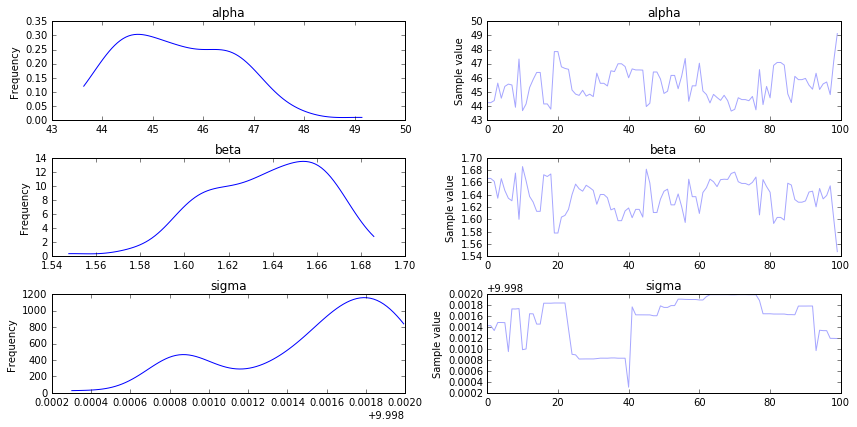

In [115]:
fig = pm.traceplot(trace)
plt.figure(figsize = (8, 8))

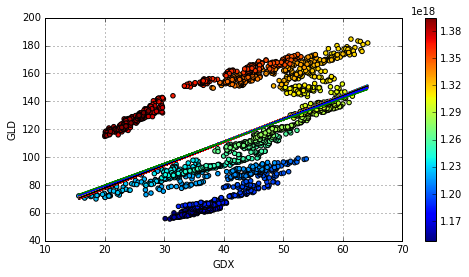

In [116]:
plt.figure(figsize = (8, 4))
plt.scatter(data['GDX'], data['GLD'], c = data.index, marker = 'o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace)):
    plt.plot(data['GDX'], trace['alpha'][i] + trace['beta'][i] * data['GDX'])
plt.colorbar()

In [118]:
model_randomwalk = pm.Model()
with model_randomwalk:
    sigma_alpha = pm.Exponential('sigma_alpha', 1. / .02, testval=.1)
    sigma_beta = pm.Exponential('sigma_beta', 1. / .02, testval=.1)

Applied log-transform to sigma_alpha and added transformed sigma_alpha_log to model.
Applied log-transform to sigma_beta and added transformed sigma_beta_log to model.


In [119]:
from pymc3.distributions.timeseries import GaussianRandomWalk

In [120]:
subsample_alpha = 50
subsample_beta = 50

with model_randomwalk:
    alpha = GaussianRandomWalk('alpha', sigma_alpha ** 2, shape = len(data) / subsample_alpha)
    beta = GaussianRandomWalk('beta', sigma_alpha ** 2, shape = len(data) / subsample_beta)
    alpha_r = np.repeat(alpha, subsample_alpha)
    beta_r = np.repeat(beta, subsample_beta)

In [121]:
len(data.dropna().GDX.values)

1967

In [122]:
with model_randomwalk:
    regression = alpha_r + beta_r * data.GDX.values[:1950]
    sd = pm.Uniform('sd', 0, 20)
    likelihood = pm.Normal('GLD', mu = regression, sd = sd, observed = data.GLD.values[:1950])

Applied interval-transform to sd and added transformed sd_interval to model.


In [124]:
with model_randomwalk:
    start = pm.find_MAP(vars = [alpha, beta], fmin = sco.fmin_l_bfgs_b)
    step = pm.NUTS(scaling = start)
    trace_rw = pm.sample(100, step, start = start, progressbar = False)

In [125]:
np.shape(trace_rw['alpha'])

(100, 39)

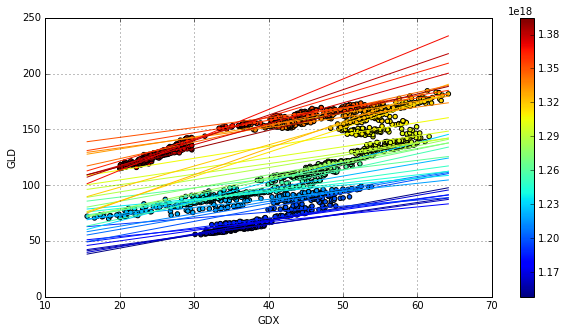

In [129]:
plt.figure(figsize = (10, 5))
plt.scatter(data['GDX'], data['GLD'], c = data.index, marker = 'o')
plt.colorbar()
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
x = np.linspace(min(data['GDX']), max(data['GDX']))
for i in range(39):
    alpha_rw = np.mean(trace_rw['alpha'].T[i])
    beta_rw = np.mean(trace_rw['beta'].T[i])
    plt.plot(x, alpha_rw + beta_rw * x, color = plt.cm.jet(256 * i / 39))